In [ ]:
# Main requirements 

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
import cv2
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BEG FUNTION DEF

In [ ]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)     # CONVERT TO GRAYSCALE
    img = equalize(img)      # STANDARDIZE THE LIGHTING IN AN IMAGE
    img = img/255            # TO NORMALIZE VALUES BETWEEN 0 AND 1 INSTEAD OF 0 TO 255
    return img

#Reshape

In [ ]:
def myModel():
    # Hyperparameter selection                                                                                                                                                                                                                   
    # Filters of the CNN                                                                                                                                                                                                         
    no_Of_Filters=60                                                                                                                                                                                                             
    # Shape of the filters used in the CNN                                                                                                                                                                                       
    size_of_Filter=(5,5)                                                                                                                                                                                                         
    size_of_Filter2=(3,3)                                                                                                                                                                                                        
    # Tekes batches of 2x2 pixels and avg the                                                                                                                                                                                    
    size_of_pool=(2,2)                                                                                                                                                                                                           
    # Nodes of the neural classifier                                                                                                                                                                                             
    no_Of_Nodes = 500                                                                                                                                                                                                            
                                                                                                                                                                                                                                 
    # TODO: Add layers as presented in the class to conform your CNN                                                                                                                                                                                                                              
                                                                                                                                                                           
    model.compile(optimizer=tf.keras.optimizers.RMSprop(),                                                                                                                                                                       
              loss=tf.keras.losses.BinaryCrossentropy(),                                                                                                                                                                         
              metrics=[tf.keras.metrics.BinaryAccuracy(),                                                                                                                                                                        
                       tf.keras.metrics.FalseNegatives()])                                                                                                                                                                       
                                                                                                                                                                                                                                 
    return model                                                                                                                                                                                                                 



END FUNTION DEF


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
################# Parameters #####################
tf.config.set_visible_devices([], 'GPU')

path = "drive/Shareddrives/TE3002B/AI_in_ROS/MyData" # folder with all the class folders
labelFile = 'drive/Shareddrives/TE3002B/AI_in_ROS/labels.csv' # file with all names of classes
batch_size_val=50  # how many to process together before updating the interanl parameters
steps_per_epoch_val=100 # we divide all our database in 10 bathces 
epochs_val=10
imageDimesions = (32,32,3)
testRatio = 0.2    # if 1000 images split will 200 for testing
validationRatio = 0.2 # if 1000 images 20% of remaining 800 will be 160 for validation
###################################################

In [ ]:
############################### Importing of the Images
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses=len(myList)
print("Importing Classes.....")

#Import names
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        images.append(curImg)
        classNo.append(count)
    print("{0} of {1}".format(count, len(myList)), end ="\n")
    count +=1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

In [ ]:
############################### Split Data
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)
 
# X_train = ARRAY OF IMAGES TO TRAIN
# y_train = CORRESPONDING CLASS ID

In [ ]:
############################### READ CSV FILE
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))

###################################################3LF
print(len(X_train))
print(len(X_test))
#print(len(label_file), label_file.shape)
#print(label_file[:10])
#####
H,W=data.shape
print(H,W)
#data = data.reshape((17076, 55 * 57 *3))
#data = data.astype('float32') / 255)


data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>
17076
5337
43 2


In [ ]:
############################### DISPLAY SOME SAMPLES IMAGES  OF ALL THE CLASSES
num_of_samples = []
cols = 5
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 300))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)- 1)], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+ "-"+row["Name"])
            num_of_samples.append(len(x_selected))

[105, 965, 946, 625, 840, 819, 190, 612, 604, 644, 846, 554, 894, 933, 353, 263, 200, 481, 499, 102, 143, 146, 164, 237, 114, 643, 266, 119, 236, 114, 194, 357, 125, 314, 192, 534, 171, 101, 905, 137, 153, 116, 120]


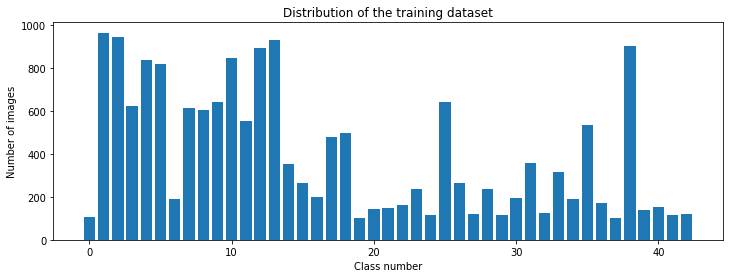

In [ ]:
############################### DISPLAY A BAR CHART SHOWING NO OF SAMPLES FOR EACH CATEGORY
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()
 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

In [ ]:
from tensorflow.core.framework.types_pb2 import DataType
############################### Split Data

 
# X_train = ARRAY OF IMAGES TO TRAIN
# y_train = CORRESPONDING CLASS ID

# TODO: Adapt the X_train, X_test, X_validation, y_train, y_test and y_validation arrays for the proper neural network training, validation and testing
#lf


print("Before")
print("Len X_train: ",len(X_train))
print("X_train[1]: ",X_train[1].shape)
#print("y_train[1]: ",y_train.shape)
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

print("#####################################################")

X_trainp=[]
X_testp=[]
y_trainp=[]
y_testp=[]

print("#####################################################")

tipo=type(X_train[1])
tipo2=type(X_test[1])
print("Tipo1", tipo)
print("Tipo1", tipo2)



for i in range(len(X_train)):
  img=X_train[i]
  label=y_train[i]
  if tipo== type(img):
    imagep=preprocessing(img)
    resized_image = cv2.resize(imagep, (32, 32))
    X_trainp.append(resized_image)
    y_trainp.append(label)

for i in range(len(X_test)):
  img2=X_test[i]
  label2=y_test[i]
  if tipo2== type(img2):
    imagep2=preprocessing(img2)
    resized_image2 = cv2.resize(imagep2, (32, 32))
    X_testp.append(resized_image2)
    y_testp.append(label2)

print("After")
print("X_trainp: ",len(X_trainp))
print("y_trainp: ",len(y_trainp))
print("X_testp: ",len(X_testp))
print("y_testp: ",len(y_testp))







Before
Len X_train:  17076
X_train[1]:  (44, 43, 3)
X_train shape: (17076,)
y_train shape: (17076,)
X_test shape: (5337,)
y_test shape: (5337,)
#####################################################
#####################################################
Tipo1 <class 'numpy.ndarray'>
Tipo1 <class 'numpy.ndarray'>
After
X_trainp:  17049
y_trainp:  17049
X_testp:  5328
y_testp:  5328


In [ ]:
############################### TRAIN
# Create model structure
model = myModel()

print(model.summary())
# Train the model

# TODO: Modify the ImageDataGenerator attributes to improve your neural network performance if necessary
dataGen = ImageDataGenerator()

history=model.fit_generator(dataGen.flow(X_train,y_train,batch_size=batch_size_val),epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=1)
model.save('drive/MyDrive/AI_in_ROS/saved_model/my_model')


NameError: ignored

Results 




In [ ]:
############################### PLOT
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

In [ ]:
model = load_model('drive/MyDrive/AI_in_ROS/saved_model/my_model')

random_index = random.randint(0, len(images))
test_image = images[random_index]

test_image = preprocessing(test_image)
test_image = cv2.resize(test_image, (imageDimesions[0], imageDimesions[1]))
test_image = tf.expand_dims(test_image, axis=0)

test_image_class =classNo[random_index]

test_image_class_prediction = model.predict(test_image)

class_val = np.argmax(test_image_class_prediction[0], axis=0)

print("IMAGE CLASS: {0}".format(test_image_class))
print("IMAGE PREDICTION: {0}".format(class_val))

The following code can be used to test the model with your USB camera. You'll have to port it into ROS 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import cv2

tf.config.set_visible_devices([], 'GPU')
 
#############################################
 
frameWidth= 640         # CAMERA RESOLUTION
frameHeight = 480
brightness = 180
threshold = 0.75         # PROBABLITY THRESHOLD
font = cv2.FONT_HERSHEY_SIMPLEX
##############################################
 
# SETUP THE VIDEO CAMERA
cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)

model = load_model('saved_model/my_model')
 
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img
def getCalssName(classNo):
    if   classNo == 0: return 'Speed Limit 20 km/h'
    elif classNo == 1: return 'Speed Limit 30 km/h'
    elif classNo == 2: return 'Speed Limit 50 km/h'
    elif classNo == 3: return 'Speed Limit 60 km/h'
    elif classNo == 4: return 'Speed Limit 70 km/h'
    elif classNo == 5: return 'Speed Limit 80 km/h'
    elif classNo == 6: return 'End of Speed Limit 80 km/h'
    elif classNo == 7: return 'Speed Limit 100 km/h'
    elif classNo == 8: return 'Speed Limit 120 km/h'
    elif classNo == 9: return 'No passing'
    elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11: return 'Right-of-way at the next intersection'
    elif classNo == 12: return 'Priority road'
    elif classNo == 13: return 'Yield'
    elif classNo == 14: return 'Stop'
    elif classNo == 15: return 'No vechiles'
    elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17: return 'No entry'
    elif classNo == 18: return 'General caution'
    elif classNo == 19: return 'Dangerous curve to the left'
    elif classNo == 20: return 'Dangerous curve to the right'
    elif classNo == 21: return 'Double curve'
    elif classNo == 22: return 'Bumpy road'
    elif classNo == 23: return 'Slippery road'
    elif classNo == 24: return 'Road narrows on the right'
    elif classNo == 25: return 'Road work'
    elif classNo == 26: return 'Traffic signals'
    elif classNo == 27: return 'Pedestrians'
    elif classNo == 28: return 'Children crossing'
    elif classNo == 29: return 'Bicycles crossing'
    elif classNo == 30: return 'Beware of ice/snow'
    elif classNo == 31: return 'Wild animals crossing'
    elif classNo == 32: return 'End of all speed and passing limits'
    elif classNo == 33: return 'Turn right ahead'
    elif classNo == 34: return 'Turn left ahead'
    elif classNo == 35: return 'Ahead only'
    elif classNo == 36: return 'Go straight or right'
    elif classNo == 37: return 'Go straight or left'
    elif classNo == 38: return 'Keep right'
    elif classNo == 39: return 'Keep left'
    elif classNo == 40: return 'Roundabout mandatory'
    elif classNo == 41: return 'End of no passing'
    elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'
     
while True:
 
    # READ IMAGE
    success, imgOrignal = cap.read()
         
    # PROCESS IMAGE
    img = np.asarray(imgOrignal)
    img = cv2.resize(img, (32, 32))
    img = preprocessing(img)

    img = img.reshape(1, 32, 32, 1)
    cv2.putText(imgOrignal, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    # PREDICT IMAGE
    predictions = model.predict(img)
    classIndex = model.predict_classes(img)
    probabilityValue =np.amax(predictions)
    if probabilityValue > threshold:
       print(getCalssName(classIndex))
       cv2.putText(imgOrignal,str(classIndex)+" "+str(getCalssName(classIndex)), (120, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
       cv2.putText(imgOrignal, str(round(probabilityValue*100,2) )+"%", (180, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
       cv2.imshow("Result", imgOrignal)
    else:
        print('Not found')
        cv2.putText(imgOrignal, 'No Traffic Sign', (120, 35), font, 0.75,
                    (0, 0, 255), 2, cv2.LINE_AA)

        cv2.imshow("Result", imgOrignal)
         
    if cv2.waitKey(1) and 0xFF == ord('q'):
       break

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('drive/MyDrive/AI_in_ROS/saved_model/my_model')
print(model.summary())
